<a href="https://colab.research.google.com/github/skj092/LeafDiseaseClassification/blob/main/Leaf_Disease_Fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.vision.all import *

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    #tf.set_random_seed(seed)

SEED = 42
seed_everything(SEED)

In [29]:
os.chdir("drive/MyDrive/LeafDiseaseClassification")

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tahsin/cassava-leaf-disease-merged")

print("Path to dataset files:", path)

In [155]:
path = Path(path)
df = pd.read_csv(path/'merged.csv')

mapping = {
    "0":"Cassava Bacterial Blight (CBB)",
    "1":"Cassava Brown Streak Disease (CBSD)",
    "2":"Cassava Green Mottle (CGM)",
    "3":"Cassava Mosaic Disease (CMD)",
    "4":"Healthy"
    }

df['classes'] = df['label'].apply(lambda x: mapping.get(str(x)))

In [156]:
df.head()

,image_id,label,source,classes
0,1000015157.jpg,0,2020,Cassava Bacterial Blight (CBB)
1,1000201771.jpg,3,2020,Cassava Mosaic Disease (CMD)
2,100042118.jpg,1,2020,Cassava Brown Streak Disease (CBSD)
3,1000723321.jpg,1,2020,Cassava Brown Streak Disease (CBSD)
4,1000812911.jpg,3,2020,Cassava Mosaic Disease (CMD)


In [157]:
df.shape

(26337, 4)

In [158]:
# # no external data
# df2020 = df.loc[df['source'] == 2020]
# print(df2020.shape)

In [159]:
dblock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_x = ColReader(cols=0, pref=f'{path}/train/'),
    get_y = ColReader(cols=3),
    splitter = RandomSplitter(),
    item_tfms = Resize(224),
    batch_tfms = aug_transforms()
  )

In [160]:
dls = dblock.dataloaders(df)

/usr/local/lib/python3.10/dist-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


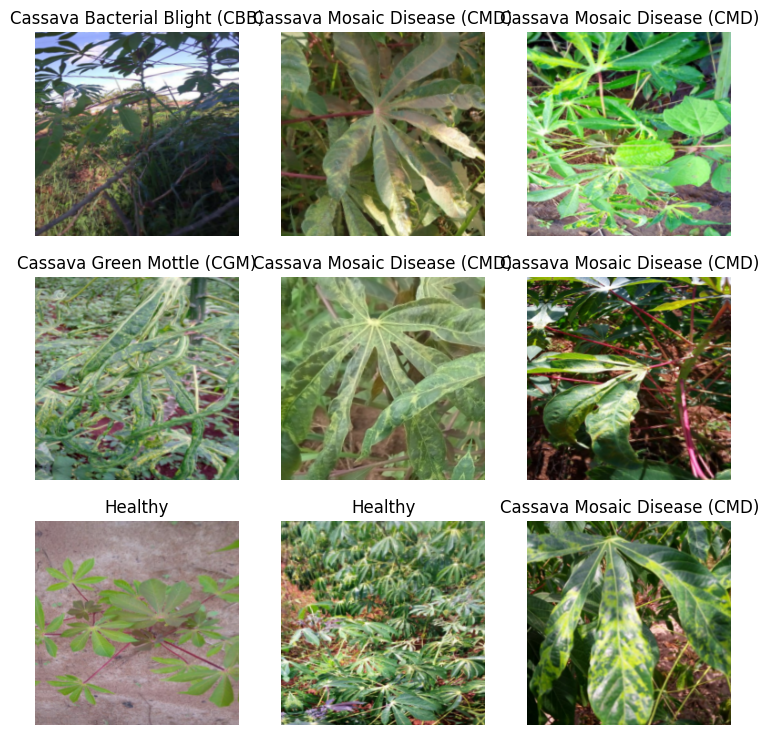

In [161]:
dls.show_batch()

In [162]:
# from sklearn.model_selection import train_test_split
# sample_df, _ = train_test_split(df, test_size=0.95, random_state=42, stratify=df['label'])
# print(f"sampel df size: {sample_df.shape}")

In [163]:
dls = dblock.dataloaders(df)

/usr/local/lib/python3.10/dist-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


In [153]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.072727,0.888858,0.687678,04:15


epoch,train_loss,valid_loss,accuracy,time
0,0.699361,0.711866,0.737612,04:25
1,0.566965,0.552958,0.805962,04:26
2,0.464831,0.561602,0.803493,04:21
3,0.386781,0.516079,0.827606,04:21
4,0.317517,0.526417,0.828365,04:20


In [165]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.041656,0.830214,0.698500,04:06


epoch,train_loss,valid_loss,accuracy,time
0,0.691736,0.636409,0.762673,04:24
1,0.566400,0.569080,0.799127,04:19
2,0.494831,0.537366,0.811657,04:33
3,0.397692,0.497073,0.824568,04:33
4,0.314331,0.493101,0.830074,04:37


In [166]:
interp = ClassificationInterpretation.from_learner(learn)
interp.confusion_matrix()

array([[ 154,   61,   18,   14,   75],
       [  20,  506,   29,   40,   56],
       [   9,   15,  462,   81,   37],
       [   4,   33,  146, 2826,   75],
       [  28,   49,   62,   43,  424]])

In [164]:
interp = ClassificationInterpretation.from_learner(learn)
interp.confusion_matrix()

array([[ 157,   36,   14,   18,   89],
       [  37,  518,   43,   44,   61],
       [   5,   14,  455,   69,   37],
       [   7,   33,  137, 2806,   66],
       [  35,   47,   61,   51,  427]])